In [112]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [78]:
df=pd.read_csv('/Users/Corentin/Desktop/statapp/df_merge.csv', low_memory=False, index_col='Unnamed: 0')
df.drop(df.index[1083398], inplace=True)
df

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,jour_année_tx,jour_mois_tx,année_tx,mois_tx
0,33859.0,6540.0,9883.0,586.61,2018-04-07,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-71.348819,0.000000,219.870222,97.0,7.0,2018.0,4.0
1,40948.0,6540.0,9883.0,586.61,2018-04-14,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,119.650647,-92.223342,0.000000,219.870222,104.0,14.0,2018.0,4.0
2,42015.0,6540.0,9883.0,586.61,2018-04-21,CHECK,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-95.501115,0.000000,219.870222,111.0,21.0,2018.0,4.0
3,50884.0,6540.0,9883.0,586.61,2018-04-28,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-99.820685,0.000000,219.870222,118.0,28.0,2018.0,4.0
4,60406.0,6540.0,9883.0,586.61,2018-05-05,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-99.908519,0.000000,219.870222,125.0,5.0,2018.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083393,1111899.0,NaN,3394.0,129.24,2021-05-22,CHECK,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,142.0,22.0,2021.0,5.0
1083394,1182395.0,NaN,3394.0,129.24,2021-07-31,WIRE,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,212.0,31.0,2021.0,7.0
1083395,1248997.0,NaN,3394.0,129.24,2021-10-09,WIRE,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,282.0,9.0,2021.0,10.0
1083396,1313587.0,NaN,3394.0,129.24,2021-12-18,CHECK,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,352.0,18.0,2021.0,12.0


In [79]:
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d', errors = 'ignore')
df['sender_birth_date'] = pd.to_datetime(df.sender_birth_date, format='%Y-%m-%d', errors = 'ignore')
df['receiver_birth_date'] = pd.to_datetime(df.receiver_birth_date, format='%Y-%m-%d', errors = 'ignore')

In [80]:
df.sort_values(by='timestamp', ascending=True, inplace=True)

In [81]:
df['is_alert_solo'].value_counts()

False    1076270
True        7128
Name: is_alert_solo, dtype: int64

In [82]:
def filter_df(time, df_to_filter):
    " Fonction qui renvoie un df trié en ne prenant que les dates du passé "
    " mettre le time sous forme 'yyyy-mm-dd' "
    df_1 = df_to_filter[df_to_filter['timestamp']<time].copy()
    return df_1

## Preprocessing 

### Sélection des features



In [83]:
df.columns

Index(['tx_id', 'sender_account_id', 'receiver_account_id', 'tx_amount',
       'timestamp', 'tx_type', 'sender_bank_id', 'sender_first_name',
       'sender_last_name', 'sender_country_code', 'sender_birth_date',
       'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_country_code', 'receiver_birth_date',
       'receiver_zip_code', 'is_alert_solo', 'is_alert_pooled',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_

In [84]:
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',

       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',

       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',

       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',

       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 

       'ecarts_tx_received_A','ecarts_tx_received_B', 
       'ecarts_tx_sent_A', 'ecarts_tx_sent_B',

       'is_alert_solo', 'is_alert_pooled']

variables_to_drop = ['tx_id', 'sender_account_id', 'receiver_account_id','sender_bank_id', 'sender_first_name',
       'sender_last_name', 'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_zip_code']

df_bis=df[variables_to_keep].copy()

In [85]:
df_bis['is_alert_pooled']= df_bis['is_alert_pooled'].apply( lambda x : int(x))
df_bis['is_alert_solo']= df_bis['is_alert_solo'].apply( lambda x : int(x))

In [86]:
#Variable catégorielle tx_type

tx_type_ = pd.get_dummies(df_bis['tx_type'],drop_first=True)
df_bis= pd.concat([df_bis, tx_type_], axis=1)
df_bis.drop(['tx_type'],axis=1,inplace=True)
df_bis.rename(columns={'WIRE': 'tx_type', 
                           }, inplace=True)
df_bis.head(3)


,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_receiver_B,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,is_alert_solo,is_alert_pooled,tx_type
191519,10.00,2018-03-03,FR,1921-11-08,FR,1918-11-09,62.0,3.0,2018.0,3.0,...,1.0,1.0,1.0,-97.817547,-93.308575,0.0,-91.674992,0,0,1
643274,8.41,2018-03-03,FR,1931-04-14,FR,1919-12-25,62.0,3.0,2018.0,3.0,...,NaN,1.0,NaN,-87.971968,NaN,0.0,NaN,0,0,1
643275,8.41,2018-03-03,FR,1931-04-14,FR,1935-09-02,62.0,3.0,2018.0,3.0,...,NaN,1.0,NaN,-93.501275,NaN,0.0,NaN,0,0,0


In [87]:
# Country_code 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
L=['sender_country_code','receiver_country_code']
for i in L: 
    le.fit(df_bis[i])
    le.classes_
    df_bis[i]= le.transform(df_bis[i])
    display(pd.DataFrame(index= [j for j in range(len(df_bis[i].unique()))],
                         data=le.inverse_transform([j for j in range(len(df_bis[i].unique()))]), columns= [i]))

,sender_country_code
0,AE
1,AF
2,AR
3,AT
4,AU
...,...
75,YE
76,ZA
77,ZM
78,ZW


,receiver_country_code
0,AE
1,AF
2,AR
3,AT
4,AU
...,...
78,YE
79,ZA
80,ZM
81,ZW


In [88]:
df_bis[['receiver_country_code','sender_country_code']].dropna(inplace=True)

/var/folders/ls/kz9r5k393xg8d3p1krqjx50m0000gn/T/ipykernel_35883/457886057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bis[['receiver_country_code','sender_country_code']].dropna(inplace=True)


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

`RobustScaler` est insensible aux outliers 
On note IQR : l'écart interquartile (Q3 -Q1) 
On a : 

$$ X_{scaled}=\frac{X - médiane}{IQR} $$

Et la médiane est beaucoup moins sensible aux outliers


Sauf que les outliers nous intéresse donc on préfère utiliser le `StandardScaler`

`StandardScaler` standardise chaque variable X : 
- la moyenne est nulle 
- l'écart type est égale à 1

    $$ X_{scaled}=\frac{X - \mu_X}{\sigma_X} $$

Gestion des valeurs manquantes  : 
- pour les valeurs count_cum qui compte le nbre de tx contenues dans A ou B en fonction de _A ou _B, on choisit de mettre la valeur 0 
- pour la reliability concernant les personnes n'apparaissant pas dans A par exemple, on choisit de mettre la valeur 1 


######  pour l'écart entre les montants passés et la tx on décide de mettre 0 quand il n'y a pas d'historique  

In [96]:
df_bis[['count_cum_receiver_A','count_cum_receiver_B','count_cum_sender_A','count_cum_sender_B']] = df_bis[['count_cum_receiver_A','count_cum_receiver_B','count_cum_sender_A','count_cum_sender_B']].fillna(0)
df_bis[['reliability_receiver_A','reliability_receiver_B','reliability_sender_A', 'reliability_sender_B']]= df_bis[['reliability_receiver_A','reliability_receiver_B','reliability_sender_A', 'reliability_sender_B']].fillna(1)
df_bis[['ecarts_tx_received_A','ecarts_tx_received_B','ecarts_tx_sent_A', 'ecarts_tx_sent_B']]= df_bis[['ecarts_tx_received_A','ecarts_tx_received_B','ecarts_tx_sent_A', 'ecarts_tx_sent_B']].fillna(0)

In [97]:
df_bis[['count_cum_receiver_A','count_cum_receiver_B','count_cum_sender_A','count_cum_sender_B']].fillna(0)
df_bis[['count_cum_receiver_A','count_cum_receiver_B','count_cum_sender_A','count_cum_sender_B']].fillna(0)

,count_cum_receiver_A,count_cum_receiver_B,count_cum_sender_A,count_cum_sender_B
191519,42.0,2.0,4.0,32.0
643274,10.0,0.0,3.0,0.0
643275,11.0,0.0,4.0,0.0
643276,12.0,0.0,5.0,0.0
643277,13.0,0.0,6.0,0.0
...,...,...,...,...
741551,14.0,0.0,242.0,0.0
741552,15.0,0.0,243.0,0.0
741553,16.0,0.0,244.0,0.0
457382,402.0,157.0,170.0,9.0


In [98]:
df_bis[df_bis.isnull().any(axis=1)]

,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_receiver_B,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,is_alert_solo,is_alert_pooled,tx_type
643274,8.41,2018-03-03,28,1931-04-14,29,1919-12-25,62.0,3.0,2018.0,3.0,...,1.0,1.000000,1.0,-87.971968,0.0,0.0,0.0,0,0,1
643275,8.41,2018-03-03,28,1931-04-14,29,1935-09-02,62.0,3.0,2018.0,3.0,...,1.0,1.000000,1.0,-93.501275,0.0,0.0,0.0,0,0,0
643276,8.41,2018-03-03,28,1931-04-14,29,1923-03-27,62.0,3.0,2018.0,3.0,...,1.0,1.000000,1.0,-87.971968,0.0,0.0,0.0,0,0,1
643277,8.41,2018-03-03,28,1931-04-14,29,1970-12-30,62.0,3.0,2018.0,3.0,...,1.0,1.000000,1.0,-19.367210,0.0,0.0,0.0,0,0,1
643278,8.41,2018-03-03,28,1931-04-14,29,1944-02-05,62.0,3.0,2018.0,3.0,...,1.0,1.000000,1.0,-87.971968,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741550,109.76,2021-12-25,28,1963-06-30,37,1995-12-03,359.0,25.0,2021.0,12.0,...,1.0,0.995851,1.0,-74.052623,0.0,0.0,0.0,0,0,1
741551,109.76,2021-12-25,28,1963-06-30,29,1942-03-12,359.0,25.0,2021.0,12.0,...,1.0,0.995868,1.0,-74.052623,0.0,0.0,0.0,0,0,1
741552,109.76,2021-12-25,28,1963-06-30,29,1952-01-11,359.0,25.0,2021.0,12.0,...,1.0,0.995885,1.0,-74.052623,0.0,0.0,0.0,0,0,1
741553,109.76,2021-12-25,28,1963-06-30,29,1944-06-13,359.0,25.0,2021.0,12.0,...,1.0,0.995902,1.0,-74.052623,0.0,0.0,0.0,0,0,0


In [103]:
#1ère approche, on drop les NaNs,
df_bis.dropna(inplace=True)
df_bis

,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_receiver_B,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,is_alert_solo,is_alert_pooled,tx_type
191519,10.00,2018-03-03,28,1921-11-08,29,1918-11-09,62.0,3.0,2018.0,3.0,...,1.000000,1.000000,1.000000,-97.817547,-93.308575,0.000000,-91.674992,0,0,1
425456,17.05,2018-03-03,28,1925-10-27,29,1951-07-04,62.0,3.0,2018.0,3.0,...,0.985646,1.000000,1.000000,-96.193517,-96.847088,0.000000,-83.192035,0,0,1
425455,17.05,2018-03-03,28,1925-10-27,29,1945-07-10,62.0,3.0,2018.0,3.0,...,0.985577,1.000000,1.000000,-96.193517,-96.847088,0.000000,-83.192035,0,0,1
19581,192.55,2018-03-03,28,1958-12-10,29,1937-01-29,62.0,3.0,2018.0,3.0,...,1.000000,1.000000,0.916667,982.349635,107.031880,0.000000,-22.480776,0,0,1
19580,192.55,2018-03-03,28,1958-12-10,29,1963-07-24,62.0,3.0,2018.0,3.0,...,1.000000,1.000000,0.909091,982.349635,11.139971,0.000000,-22.480776,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011359,18.54,2021-12-25,28,1968-11-25,29,1946-01-29,359.0,25.0,2021.0,12.0,...,1.000000,0.974359,0.985437,-71.640535,41.095890,-96.781026,0.000000,0,0,1
1011358,18.54,2021-12-25,28,1968-11-25,18,1940-02-06,359.0,25.0,2021.0,12.0,...,1.000000,0.974026,0.985294,-35.106755,41.095890,-96.781026,0.000000,0,0,1
917365,558.26,2021-12-25,28,1960-06-18,29,1966-04-30,359.0,25.0,2021.0,12.0,...,1.000000,1.000000,1.000000,233.508573,670.864402,2023.469000,0.000000,0,0,1
1071803,599.59,2021-12-25,28,1955-12-09,29,1971-11-13,359.0,25.0,2021.0,12.0,...,0.988764,1.000000,1.000000,340.324594,37.074208,34.040508,0.000000,0,0,1


In [143]:
# On fixe une date t 
# On va prédire le caractère frauduleux de la tx en ne prenant que les tx passées 
time = '2021-05-16'
time_1_month = '2021-06-16'
df_3 = filter_df(time, df_bis)

X_train=df_3.drop(['is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp'],axis=1)
y_train= df_3['is_alert_pooled']

X_t=X_train.copy()


In [144]:
# On ne prend que les valeurs du mois prochain 
df4 = df_bis[(df_bis.timestamp<time_1_month)&(df_bis.timestamp>=time)]

X_test = df4.drop(['is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp'],axis=1)
y_test = df4['is_alert_pooled']

In [139]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
X_test= scaler.transform(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13882
           1       1.00      0.84      0.91        19

    accuracy                           1.00     13901
   macro avg       1.00      0.92      0.96     13901
weighted avg       1.00      1.00      1.00     13901

[[13882     0]
 [    3    16]]


<AxesSubplot:>

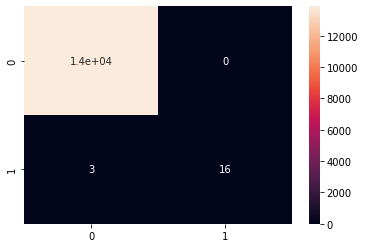

In [149]:
model = RandomForestClassifier(n_estimators=50, max_depth=10 ) 
#model = LogisticRegression()

model.fit(X_train, y_train) 

predictions= model.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
#sns.heatmap(confusion_matrix(y_train,model.predict(X_train)),annot=True)

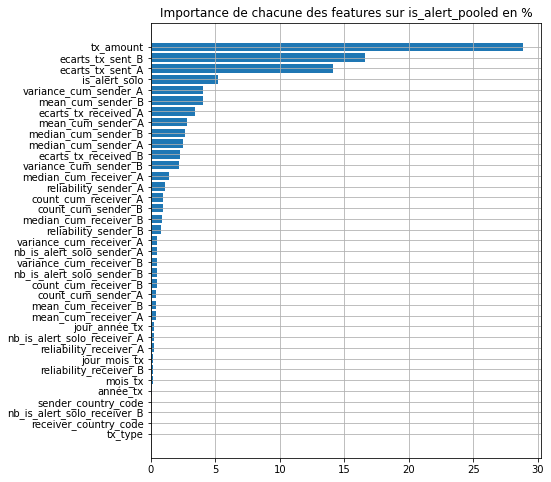

In [150]:
#RFClassifier
importances = model.feature_importances_

indices = np.argsort(importances)


fig, ax = plt.subplots(figsize=(7,8))
ax.barh(range(len(importances)), importances[indices]*100)
ax.set_yticks(range(len(importances)), colors='royalblue')
_ = ax.set_yticklabels(np.array(X_t.columns)[indices])
plt.grid()
plt.title("Importance de chacune des features sur is_alert_pooled en %")
plt.show()